In [2]:
!pip install -q pydub

In [35]:
import os
import pydub
import matplotlib.pyplot as plt


In [4]:
voice=pydub.AudioSegment.from_file("/content/drive/MyDrive/Dataset/Audio/raw_data/Kiana.ogg") #خواندن فایل صوتی

In [8]:
voice  

In [6]:
voice.export('/content/drive/MyDrive/Dataset/Audio/raw_data/Kiana.wav')

<_io.BufferedRandom name='/content/drive/MyDrive/Dataset/Audio/raw_data/Kiana.wav'>

In [10]:
#ادغام دو فایل صوتی

voice_1 = pydub.AudioSegment.from_file("/content/drive/MyDrive/Dataset/Audio/raw_data/Khadijeh_1.ogg")
voice_2 = pydub.AudioSegment.from_file("/content/drive/MyDrive/Dataset/Audio/raw_data/Khadijeh_2.ogg")

result = voice_1 + voice_2

result.export("/content/drive/MyDrive/Dataset/Audio/data/Khadijeh.ogg")

<_io.BufferedRandom name='/content/drive/MyDrive/Dataset/Audio/data/Khadijeh.ogg'>

In [11]:
#ادغام دو فایل صوتی

voice_1 = pydub.AudioSegment.from_file("/content/drive/MyDrive/Dataset/Audio/raw_data/Parsa_1.ogg")
voice_2 = pydub.AudioSegment.from_file("/content/drive/MyDrive/Dataset/Audio/raw_data/Parsa_2.ogg")

result = voice_1 + voice_2

result.export("/content/drive/MyDrive/Dataset/Audio/data/Parsa.ogg")

<_io.BufferedRandom name='/content/drive/MyDrive/Dataset/Audio/data/Parsa.ogg'>

In [12]:
voice = pydub.AudioSegment.from_file('/content/drive/MyDrive/Dataset/Audio/raw_data/Mona.m4a')
voice.export("/content/drive/MyDrive/Dataset/Audio/data/Mona.ogg")

<_io.BufferedRandom name='/content/drive/MyDrive/Dataset/Audio/data/Mona.ogg'>

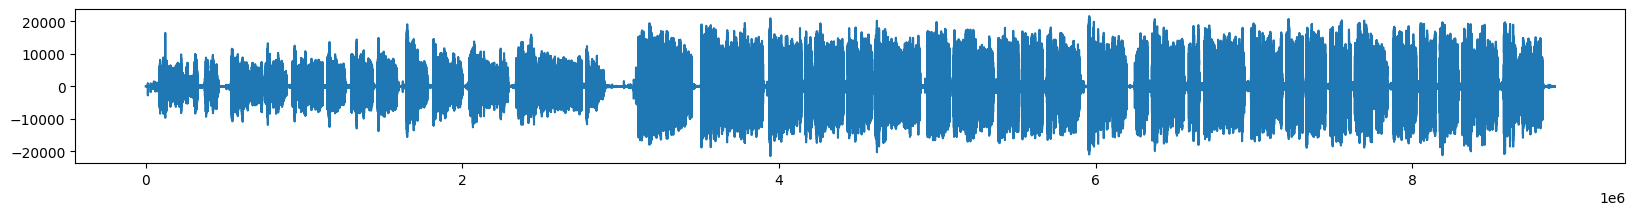

In [31]:
voice_1 = pydub.AudioSegment.from_file('/content/drive/MyDrive/Dataset/Audio/data/Khadijeh.ogg')
type(voice_1)

voice_2 = voice_1.get_array_of_samples() 
type(voice_2)

plt.figure(figsize=(20, 2))
plt.plot(voice_2)
plt.show()

In [32]:
parts = pydub.silence.split_on_silence(voice_1, min_silence_len=2000, silence_thresh=-45) 

parts

In [ ]:
result = sum(parts)  
result.export('/content/drive/MyDrive/Dataset/Audio/data/Khadijeh.ogg') 

حذف سکوت همه فایلها به صورت یکجا:

In [ ]:
files = os.listdir("/content/drive/MyDrive/Dataset/Audio/data")

for file in files:
  audio = pydub.AudioSegment.from_file(os.path.join("/content/drive/MyDrive/Dataset/Audio/data", file))


  chunks = pydub.silence.split_on_silence(audio, min_silence_len=2000, silence_thresh=-45)
  result = sum(chunks)
  file_name = file.split(".")[0] 
  result.export("/content/drive/MyDrive/Dataset/Audio/wav_data/"+file_name+".wav") 

In [46]:
wav_data_path = "/content/drive/MyDrive/Dataset/Audio/wav_data"

for file in os.listdir(wav_data_path):
  audio = pydub.AudioSegment.from_file(os.path.join(wav_data_path, file))

  person_name = file.split(".")[0]
  os.makedirs(os.path.join("/content/drive/MyDrive/Dataset/Audio/dataset", person_name), exist_ok=True) 
  

  audio = audio.set_sample_width(2)  
  audio = audio.set_frame_rate(48000) 
  audio = audio.set_channels(1) 

  chunks = pydub.utils.make_chunks(audio, 1000) 
  for i, chunk in enumerate(chunks):
    if len(chunk) >= 1000:  
      chunk.export(os.path.join("/content/drive/MyDrive/Dataset/Audio/dataset", person_name, f"voice{i}.wav"))

